In [22]:
# Network-x imports
from networkx.readwrite.graphml import read_graphml
import networkx as nx

# Graph Kernels import
from grakel.utils import graph_from_networkx
from grakel.kernels import WeisfeilerLehman, VertexHistogram, ShortestPath, RandomWalk, SubgraphMatching, NeighborhoodHash, GraphletSampling, PyramidMatch, SvmTheta

# SVM imports
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# general imports
import os

# Data Preprocessing

## Data Loading

In [23]:
graphs = list()
labels = list()
tags = {'Linear': 0, 'Binary': 1, 'BFS': 2, 'DFS': 3}

for algo in os.listdir('CFG/Searching/'):
    count = 1
    for file in os.listdir('CFG/Searching/'+algo):
        graphs.append(read_graphml('CFG/Searching/'+algo+'/'+file))
        labels.append(tags[algo])
        if(count == 700):
            break
        count += 1

In [24]:
len(graphs), len(labels)

(2670, 2670)

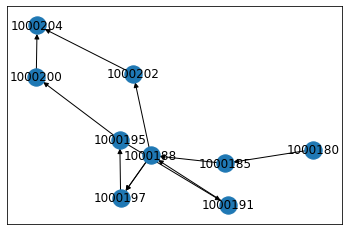

In [25]:
nx.draw_networkx(graphs[0])

In [26]:
G_train, G_test, Y_train, Y_test = train_test_split(graphs, labels, test_size=0.20, random_state=42)
len(G_train), len(G_test), len(Y_train), len(Y_test)

(2136, 534, 2136, 534)

## Convert Network-X Graph to Adj List Representation of GraKel

In [27]:
G_train = list(graph_from_networkx(G_train, node_labels_tag='label'))
G_test = list(graph_from_networkx(G_test, node_labels_tag='label'))

In [28]:
G_train[0]

[{'1000157': {'1000161': 1.0},
  '1000161': {'1000164': 1.0},
  '1000164': {'1000170': 1.0, '1000174': 1.0},
  '1000167': {'1000164': 1.0},
  '1000169': {'1000167': 1.0},
  '1000170': {'1000169': 1.0},
  '1000174': {'1000178': 1.0},
  '1000178': {'1000181': 1.0},
  '1000181': {'1000189': 1.0, '1000196': 1.0},
  '1000184': {'1000181': 1.0},
  '1000188': {'1000184': 1.0, '1000193': 1.0},
  '1000189': {'1000188': 1.0},
  '1000193': {'1000184': 1.0},
  '1000196': {'1000199': 1.0},
  '1000199': {'1000207': 1.0, '1000216': 1.0},
  '1000202': {'1000199': 1.0},
  '1000205': {'1000202': 1.0},
  '1000207': {'1000210': 1.0},
  '1000210': {'1000213': 1.0},
  '1000213': {'1000205': 1.0},
  '1000216': {}},
 {'1000157': '(METHOD,dfs)',
  '1000161': '(<operator>.assignment,u=0)',
  '1000164': '(<operator>.lessThan,u<n)',
  '1000167': '(<operator>.postIncrement,u++)',
  '1000169': '(<operator>.assignment,c[u]=WHITE)',
  '1000170': '(<operator>.indirectIndexAccess,c[u])',
  '1000174': '(<operator>.assig

# Kernel Computation & SVM

## 1. Compute the Weisfeiler Lehman Kernel

In [29]:
# Initialize a Weisfeiler-Lehman subtree kernel
gk = WeisfeilerLehman()

In [30]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [31]:
K_train

array([[158,   0,   0, ...,   0,   0,   6],
       [  0, 160,  19, ...,  13,  12,   4],
       [  0,  19, 298, ...,  29,  12,   6],
       ...,
       [  0,  13,  29, ..., 292,  12,   2],
       [  0,  12,  12, ...,  12, 120,   0],
       [  6,   4,   6, ...,   2,   0, 242]], dtype=int64)

In [32]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
# Test classifier
Y_pred = clf.predict(K_test)

In [14]:
# Analysis
count = 0
for i in range(len(Y_test)):
    if Y_test[i] != Y_pred[i]:
        count += 1
        print(i+1, Y_test[i], Y_pred[i])
print(count)

11 0 1
13 1 0
21 2 3
22 0 1
31 1 2
32 0 1
33 3 2
41 3 2
49 1 0
51 3 0
58 1 0
60 0 1
71 0 1
72 0 1
95 2 3
96 1 0
101 1 2
102 1 0
104 3 0
106 0 1
117 1 0
124 2 0
130 0 1
133 1 0
141 0 1
145 2 3
147 0 1
159 1 0
161 1 0
162 0 1
173 0 1
180 2 3
181 0 1
186 0 1
194 1 0
196 0 3
199 0 1
200 1 0
201 2 0
211 2 3
233 1 0
244 2 3
250 3 2
254 1 0
271 0 1
273 3 2
278 1 2
299 0 1
315 0 1
316 1 0
318 2 3
323 2 3
329 3 2
341 3 2
343 0 1
344 2 0
353 3 2
362 0 1
363 3 2
370 0 1
377 3 2
384 3 2
386 0 1
406 0 1
407 1 2
424 1 0
438 3 2
443 3 2
465 2 3
483 1 0
484 0 1
493 1 2
497 0 1
498 1 0
532 0 1
533 2 3
76


In [15]:
# Kernel Matrix
K_test.shape

(534, 2136)

In [16]:
graphs1 = list()
labels1 = list()
tags = {'Bubble': 0, 'Insertion': 1, 'Selection': 2, 'Counting': 3, 'Merge': 4, 'Quick': 5}

for algo in os.listdir('CFG'):
    count = 1
    for file in os.listdir('CFG/'+algo):
        graphs1.append(read_graphml('CFG/'+algo+'/'+file))
        labels1.append([tags[algo], file])
        if(count == 700):
            break
        count += 1

IsADirectoryError: [Errno 21] Is a directory: 'CFG/Searching/Linear'

In [16]:
G_train1, G_test1, Y_train1, Y_test1 = train_test_split(graphs1, labels1, test_size=0.20, random_state=42)
len(G_train1), len(G_test1), len(Y_train1), len(Y_test1)

(3360, 840, 3360, 840)

In [17]:
# Analysis
r_tags = {0: 'Bubble', 1: 'Insertion', 2: 'Selection', 3:'Counting', 4: 'Merge', 5: 'Quick'}
count = 0
for i in range(len(Y_test)):
    if Y_test[i] != Y_pred[i]:
        count += 1
        print(i+1, Y_test1[i], [Y_pred[i], r_tags[Y_pred[i]]])
print(count)

10 [3, 'counting1979559.graphml'] [4, 'Merge']
15 [1, 'insertion3893366.graphml'] [0, 'Bubble']
17 [4, 'merge1515388.graphml'] [2, 'Selection']
18 [2, 'selection2272079.graphml'] [4, 'Merge']
23 [5, 'quick672841.graphml'] [4, 'Merge']
56 [2, 'selection3895884.graphml'] [1, 'Insertion']
59 [5, 'quick2856923.graphml'] [4, 'Merge']
83 [3, 'counting3955982.graphml'] [4, 'Merge']
85 [2, 'selection4158811.graphml'] [4, 'Merge']
93 [4, 'merge3750272.graphml'] [5, 'Quick']
109 [0, 'bubble3275457.graphml'] [1, 'Insertion']
115 [2, 'selection3246904.graphml'] [1, 'Insertion']
123 [4, 'merge2128156.graphml'] [2, 'Selection']
125 [2, 'selection4034930.graphml'] [4, 'Merge']
140 [1, 'insertion910198.graphml'] [0, 'Bubble']
144 [0, 'bubble1896879.graphml'] [4, 'Merge']
148 [1, 'insertion2998924.graphml'] [5, 'Quick']
149 [2, 'selection3855765.graphml'] [0, 'Bubble']
152 [2, 'selection4659872.graphml'] [0, 'Bubble']
156 [4, 'merge4029017.graphml'] [5, 'Quick']
161 [5, 'quick4616656.graphml'] [4, 'Mer

In [34]:
# Evaluate the predictions
print("Accuracy:", accuracy_score(Y_test, Y_pred))

Accuracy: 0.8576779026217228


In [35]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[115  26   0   1]
 [ 17 112   5   0]
 [  3   0 107  10]
 [  2   0  12 124]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       142
           1       0.81      0.84      0.82       134
           2       0.86      0.89      0.88       120
           3       0.92      0.90      0.91       138

    accuracy                           0.86       534
   macro avg       0.86      0.86      0.86       534
weighted avg       0.86      0.86      0.86       534



In [19]:
K_train.shape

(2136, 2136)

## 2. The random walk kernel class (Time Consuming)

In [51]:
gk = RandomWalk()

In [52]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [53]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
# Test classifier
Y_pred = clf.predict(K_test)

In [55]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[31 52  3 56]
 [16 52  7 59]
 [26 20 41 33]
 [40 10 11 77]]
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       142
           1       0.39      0.39      0.39       134
           2       0.66      0.34      0.45       120
           3       0.34      0.56      0.42       138

    accuracy                           0.38       534
   macro avg       0.42      0.38      0.38       534
weighted avg       0.41      0.38      0.37       534



## 3. Subgraph Matching

In [36]:
gk = SubgraphMatching(ke=None)

In [37]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [38]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
# Test classifier
Y_pred = clf.predict(K_test)

In [40]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[118  22   1   1]
 [ 15 116   3   0]
 [  4   0 103  13]
 [  4   1  13 120]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       142
           1       0.83      0.87      0.85       134
           2       0.86      0.86      0.86       120
           3       0.90      0.87      0.88       138

    accuracy                           0.86       534
   macro avg       0.86      0.86      0.86       534
weighted avg       0.86      0.86      0.86       534



## 4. NeighborhoodHash Kernel

In [41]:
gk = NeighborhoodHash()

In [42]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

/home/suraj/apps/anaconda3/lib/python3.7/site-packages/grakel-0.1b7-py3.7-linux-x86_64.egg/grakel/kernels/neighborhood_hash.py:170: UserWarning: Number of labels is smaller thanthe biggest possible.. Collisions will appear on the new labels.
  warnings.warn('Number of labels is smaller than'


In [43]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [44]:
# Test classifier
Y_pred = clf.predict(K_test)

In [45]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[104  30   6   2]
 [ 22 106   5   1]
 [  0   2  98  20]
 [  3   0  13 122]]
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       142
           1       0.77      0.79      0.78       134
           2       0.80      0.82      0.81       120
           3       0.84      0.88      0.86       138

    accuracy                           0.81       534
   macro avg       0.80      0.81      0.80       534
weighted avg       0.81      0.81      0.80       534



## 5.  GraphletSampling Kernel

In [46]:
gk = GraphletSampling()

In [47]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [48]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
# Test classifier
Y_pred = clf.predict(K_test)

In [50]:
print(metrics.confusion_matrix(Y_test, Y_pred))

# Print the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, digits=2))

[[107  28   4   3]
 [  4 119   9   2]
 [  5   5  99  11]
 [  1   2  17 118]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.83       142
           1       0.77      0.89      0.83       134
           2       0.77      0.82      0.80       120
           3       0.88      0.86      0.87       138

    accuracy                           0.83       534
   macro avg       0.83      0.83      0.83       534
weighted avg       0.84      0.83      0.83       534



## 6. SvmTheta Match

In [111]:
gk = SvmTheta()

In [ ]:
# Construct kernel matrices
K_train = gk.fit_transform(G_train)
K_test = gk.transform(G_test)

In [ ]:
# Train an SVM classifier
clf = SVC(kernel='precomputed')
clf.fit(K_train, Y_train) 